In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Stat_for_2018_year.csv', encoding='ISO-8859–1', index_col=None)
data.shape

(237, 3)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ×èñëî áðàêîâàííûõ ëèñòîâ  237 non-null    int64  
 1   Ñêîðîñòü ïðîêàòêè         237 non-null    float64
 2   Ìàðêà ñòàëè               237 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


In [4]:
data.rename(columns={'×èñëî áðàêîâàííûõ ëèñòîâ': 'число_бракованных'}, inplace=True)
data.rename(columns={'Ñêîðîñòü ïðîêàòêè': "скорость_прокатки"}, inplace=True)
data.rename(columns={'Ìàðêà ñòàëè': 'Марка_стали'}, inplace=True)

In [5]:
x_columns = ["число_бракованных", "скорость_прокатки"]
target_column = ["Марка_стали"]

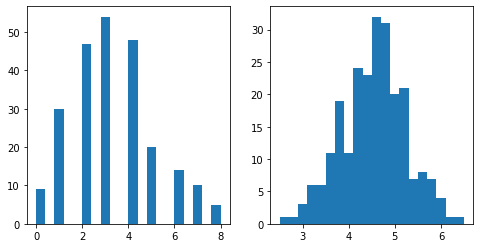

In [6]:
plt.figure(figsize=[8, 4])
plt.subplot(1, 2, 1)
plt.hist(data["число_бракованных"], bins=20);

plt.subplot(1, 2, 2)
plt.hist(data['скорость_прокатки'], bins=20);

## Утверждение 1: Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.

In [7]:
count_a=0
count_b=0
for row in data[["число_бракованных", "Марка_стали"]].values:
  if row[0] > 3 and row[1] == 'A':
    count_a += 1
  if row[0] > 3 and row[1] == 'B':
    count_b += 1
print('число_бракованных_A =', count_a, 'число_бракованных_B =', count_b)

число_бракованных_A = 53 число_бракованных_B = 44


## Проверим утверждение, используя критерий хи-квадрат
0-ая гипотеза: p1=p2=0.5 (вероятность более 3 бракованных А = вероятность более 3 бракованных В)

n = более 3ех бракованных листов марки А и В

статистика: T = (n*p1 - count_b)^2/n*p1 + (n*p2 - count_a)^2/n*p2

При истинности 0ой гипотезы статистика стремится по распределению к Хи-квадрат с N-1 степенью свободы (N=2) => Хи-квадрат(1)

Если уровень значимости alpha = 0.05 => Хи-квадрат_(1-альфа)_кванить = 3.8
Если уровень значимости alpha = 0.75 => Хи-квадрат_(1-альфа)_кванить = 0.1
Если T > Хи-квадрат_(1-альфа)_кванить, то отклоняем гипотезу

In [8]:
p = p1 = p2 = 0.5
n = count_a + count_b 
T = (n*p - count_b)**2/n*p + (n*p - count_a)**2/n*p
print(T)


0.20876288659793815


Т = 0.20876288659793815

Т.е. при альфа = 0.05 (Хи-квадрат_(1-альфа)_кванить = 3.8), не отклоняем нулевую гипотезу
А при альфа = 0.75 (Хи-квадрат_(1-альфа)_кванить = 0.1), то нулевую гипотезу отклоняем. Т.е. мы на 25% уверены в том, что более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.

## Утверждение 2: При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.

In [9]:
count_more_then_4=0
count_less_then_4=0
for row in data[["число_бракованных", "скорость_прокатки"]].values:
  if row[1] > 4 and row[0]>3:
    count_more_then_4 += 1
  if row[1] <= 4 and row[0]>3:
    count_less_then_4 += 1

print('More_then_4 =', count_more_then_4, 'Less_then_4 =', count_less_then_4)

More_then_4 = 74 Less_then_4 = 23


##Снова проверим утверждение критерием Хи-квадрат


0-ая гипотеза: p1=p2=0.5 (вероятность более 3 бракованных при скоростях свыше 4м/c = вероятность более 3 бракованных при скоростях не выше 4м/с)

n = общее кол-во партий, у которых более 3ех бракованных листов

статистика: T = (n*p1 - count_b)^2/n*p1 + (n*p2 - count_a)^2/n*p2

При истинности 0ой гипотезы статистика стремится по распределению к Хи-квадрат с N-1 степенью свободы (N=2) => Хи-квадрат(1)

Если уровень значимости alpha = 0.01 => Хи-квадрат_(1-альфа)_кванить = 6.6
Если T > Хи-квадрат_(1-альфа)_кванить, то отклоняем нулевую гипотезу

In [10]:
p = 0.5
n = count_more_then_4 + count_less_then_4
T = (n*p - count_more_then_4)**2/n*p + (n*p - count_less_then_4)**2/n*p
print(T)

# т.е. мы на 99% уеверны в том, что при скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию
#выходит значимо чаще, чем при меньших скоростях прокатки.

6.703608247422681


Т = 6.703608247422681

Т.е. при альфа = 0.01 (Хи-квадрат_(1-альфа)_кванить = 6.6) => отклоняем нулевую гипотезу

Т.е. мы на 99% уверены в том, что при скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.